In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train.csv", index_col=0)
test = pd.read_csv("data/test.csv", index_col=0)  # does not contain targets

__Kanskje minske FP__

In [3]:
train.shape, test.shape

((614, 12), (367, 11))

In [4]:
train.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
train.Loan_Status.value_counts()  # Amount of target values

Y    422
N    192
Name: Loan_Status, dtype: int64

There is alot more _Yes_ than it is _No_. Need to take this into considuration when training models.

_What kind of data do we have?_

- Binary data (_categorical_):

    *  Gender
    * Married
    * Education
    * Self_Employed
    * Credit_History
    * Loan_Status (__TARGET__)
    
- Nominal data (_categorical_):

    * Property_Area
    
    
- Ordinal data (_categorical_):

    * Dependents
    * Loan_Amount_Term (mabye also continous)
    
- Continous data:
    
    * ApplicationIncome
    * CoapplicantIncome
    * LoanAmount

## Look for NaN values in data

In [6]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train[train.isna().any(axis=1)]  # data that has a NaN in it's row

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [8]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Over 137 rows (out of 614 rows) contains nan values. Therefore, it would not be a good idea to remove rows containing nan becuase we will remove too much information. But, for evalutaing for loan or not, we should not considure the gender, so we could probably easily remove that column. 

Married might be important if the partner has high income. may also be very correlated to paratner income (0 if no partner and has a value if they are married). Therefore, it might not need this column either. (need to check for this)

Do not know what Dependents is, so need to look into this one.

LoanAmount is has NaN's??? Why should the be given a loan if this is not filled? (Mabye it is what they have loan ATM, need to look closer into this one too)

Loan_Amount_Term has nan's too, mabye use missing indicator or mabye itterative imputer? Need more evalutation too.

Credit_History is also a column that needs more evalutation. Missing indicator could be the way to go here too.

## Does "Married" with value "No" always 0 in "CoapplicantIncome"?

In [9]:
train[train["Married"] == "No"].CoapplicantIncome.value_counts()

0.0        143
1666.0       4
2531.0       2
2083.0       2
41667.0      1
          ... 
2598.0       1
4232.0       1
2167.0       1
2500.0       1
5063.0       1
Name: CoapplicantIncome, Length: 66, dtype: int64

Most of the time it is 0, but it has alot of other values than zero too. Therefore, it is not complitly dependet with "No" in "Married", but may have some. Therefore, we can use both when traning for best models.

## Closer look at LoanAmount

In [10]:
train.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [11]:
train[train.LoanAmount == 0]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,


It looks like that LoanAmount does not have any 0 values. This may where our NaN values comes in. We could probably turn NaN values in LoanAmount into 0 to solve the problem.

Lets see how LoanAmount with NaN is related to Loan_Status:

In [12]:
train[train.LoanAmount.isnull()].Loan_Status.value_counts()

N    11
Y    11
Name: Loan_Status, dtype: int64

50/50 yes and no. Does not know what LoanAmount is ment to be. Is it the amount that they want to loan or is it the amount that they are loaning atm?

Since it is 50/50 yes and no, it would mabye not be a problem to remove rows that has nans? Not sure.

Mabye indicate missing value here too? Or mabye even itterative imputer? It is probably smart to check multiple options.

## How does Loan_Amount_Term look like?

First, lets see if Loan_Amount_Term and LoanAmount misses values at the same place:

In [13]:
train[train.Loan_Amount_Term.isnull()].LoanAmount.isnull().sum()

0

No, they miss values on different places.

How is the distribution between Loan_Amount_Term and Loan_Status:

In [14]:
train[train.Loan_Amount_Term.isnull()].Loan_Status.value_counts()

Y    8
N    6
Name: Loan_Status, dtype: int64

Almost 50/50, but hase some difference.

In [15]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Does only have 10 unique values, therefore way may say that this is ordinal data. Most of the values is at 360 (think that is 360 months so 30 years).

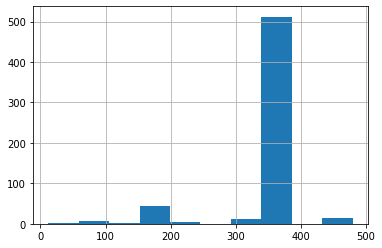

In [16]:
train.Loan_Amount_Term.hist()
plt.show()

## Distibution on the continous data + Loan_Amount_Term

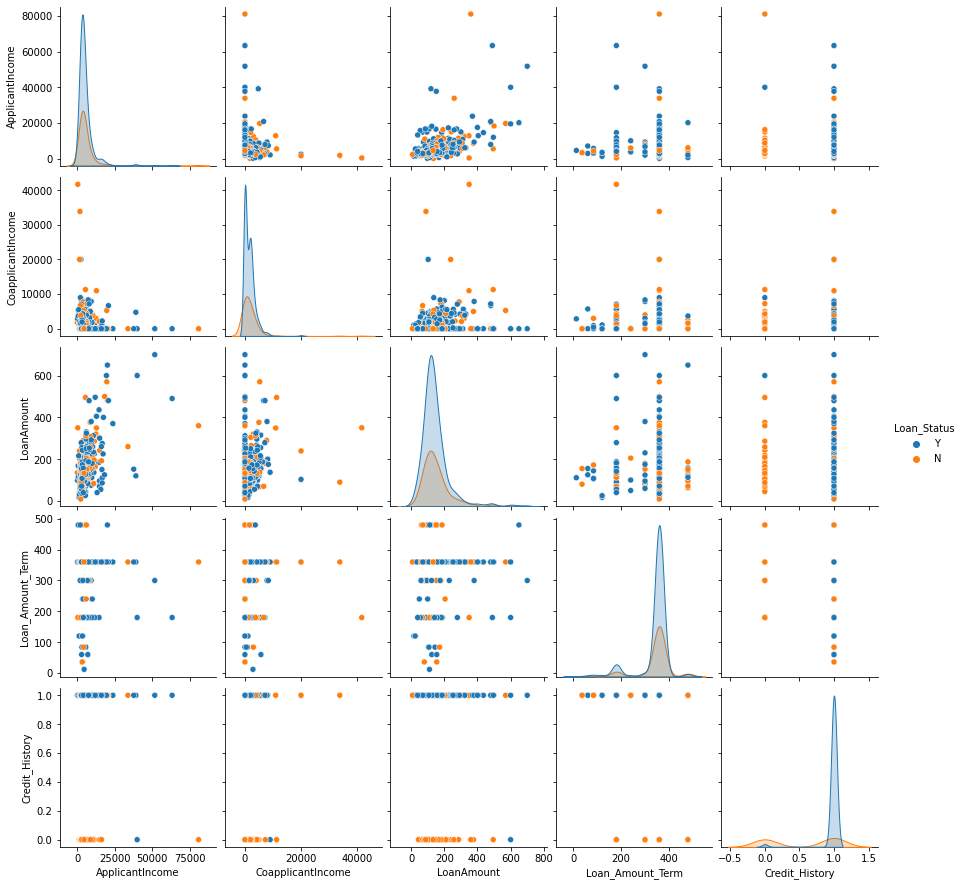

In [17]:
sns.pairplot(train, hue="Loan_Status")
plt.show()

Seems like `Credit_History` is a very importand feature. It seems to disriminate very well (especially for _N_ in our target value). We can see this trend in `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount` and `Loan_Amount_Term`.

It looks like some of the data is very skewed too. May be an idea to use some kind of transformation to get them more normally distributed, or closer to eachother to make them get a more linear trend.

`Loan_Amount_Term` seems to have two seperate distributions inside itself. This is mabye because it is ordinal data and does not contain alot of unique values.

## Is there any duplicated values?

In [18]:
train[train[train.columns].duplicated()] 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,


Nope, no duplicated rows in our data.

## Do something with the missing values...

#### Gender:

Kan egentlig bare fjerne den

In [55]:
train_no_gender = train.copy().drop(columns="Gender")
test_no_gedner = test.copy().drop(columns="Gender")

#### Married:

Remove rows that have nan in married

In [56]:
train_no_nan_married = train_no_gender.copy().dropna(axis=0, subset=["Married"])
train_no_nan_married = pd.get_dummies(train_no_nan_married, columns=["Married"], drop_first=True)

#### Dependents:

First transform str into int

In [57]:
train_dependent_only_int = train_no_nan_married.copy().replace("3+", 3)
for number in range(0, 3):
    train_dependent_only_int = train_dependent_only_int.replace(f"{number}", number)

Now replacing nans in Dependents to Median vlaues and add a missing indicator:

In [58]:
train_dependents_no_nan = train_dependent_only_int.copy()
median = np.nanmedian(train_dependent_only_int.Dependents)
train_dependents_no_nan["Missing_Dependents"] = [int(x) for x in train_dependent_only_int.Dependents.isnull().values]
train_dependents_no_nan.Dependents = train_dependent_only_int.copy().Dependents.fillna(median)

#### Education:
Transform using dummies

In [59]:
train_education_dummies = pd.get_dummies(train_dependents_no_nan.copy(), columns=["Education"], drop_first=True)

#### Self_Employed:

First, add missing indicator for missing values (nan values)

Second, replace nan with 0, "No" with 0 and "Yes" with 1

In [60]:
from sklearn.impute import MissingIndicator
missing_ind = MissingIndicator(error_on_new=True, features="missing-only")
train_self_employed_encoded = train_education_dummies.copy()

train_self_employed_encoded["Missing_Self_Employed"] = missing_ind.fit_transform(train_self_employed_encoded.Self_Employed.values.reshape(-1, 1))
train_self_employed_encoded["Missing_Self_Employed"] = train_self_employed_encoded["Missing_Self_Employed"].replace([True, False], [1, 0])
train_self_employed_encoded.Self_Employed = train_self_employed_encoded.Self_Employed.replace([np.nan, "No", "Yes"], [0, 0, 1]) 

#### Loan_Amount_Term

Replace nan's with median:

In [61]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="median")

train_imputed_loan_amount_term = train_self_employed_encoded.copy()
train_imputed_loan_amount_term.Loan_Amount_Term = si.fit_transform(train_imputed_loan_amount_term.Loan_Amount_Term.values.reshape(-1, 1))

#### Credit_History

Since there is alot of missing values, and we do not know if they are missing at random or not, we think that this may indicate that that our missing data is predicative.

Therefore, we will add a median value and a missing indicator:

In [62]:
train_credit_history_no_nan = train_imputed_loan_amount_term.copy()

missing_ind = MissingIndicator(error_on_new=True, features="missing-only")
si = SimpleImputer(strategy="median")

train_credit_history_no_nan["Missing_Credit_History"] = missing_ind.fit_transform(train_credit_history_no_nan.Credit_History.values.reshape(-1, 1))
train_credit_history_no_nan["Missing_Credit_History"] = train_credit_history_no_nan["Missing_Credit_History"].replace([True, False], [1, 0])

train_credit_history_no_nan.Credit_History = si.fit_transform(train_credit_history_no_nan.Credit_History.values.reshape(-1, 1))

#### Property_Area:

Since it is nominal data, we will use pandas get_dummies:

In [63]:
train_property_area = pd.get_dummies(train_credit_history_no_nan.copy(), columns=["Property_Area"], drop_first=True)

#### Loan_Status:

Out target musst also be 0 and 1:

In [64]:
train_target_bin = pd.get_dummies(train_property_area.copy(), columns=["Loan_Status"], drop_first=True)

#### LoanAmount:

Since we do not know how much they want to borrow, we will use itterative imputer to tell what they might borrow:

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train_LoanAmount_itterative_imputer = train_target_bin.copy()

X = train_LoanAmount_itterative_imputer.iloc[:, :-1]
y = train_LoanAmount_itterative_imputer.iloc[:, -1]

imp_mean = IterativeImputer(random_state=0)
X = imp_mean.fit_transform(X)

X = pd.DataFrame(X, columns=train_LoanAmount_itterative_imputer.iloc[:, :-1].columns)

In [66]:
X

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Missing_Dependents,Education_Not Graduate,Missing_Self_Employed,Missing_Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,5849.0,0.0,138.028436,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,3.0,0.0,4106.0,0.0,40.000000,180.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
608,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
609,2.0,0.0,7583.0,0.0,187.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
y.value_counts()

1    419
0    192
Name: Loan_Status_Y, dtype: int64

In [68]:
X.isnull().sum()

Dependents                 0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Married_Yes                0
Missing_Dependents         0
Education_Not Graduate     0
Missing_Self_Employed      0
Missing_Credit_History     0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

## Transform `Dependents`'s string values into integers

## Transform our binary data into 1 and 0 and nominal data into dummies

In [69]:
#train_bin = pd.get_dummies(data=train, columns=["Gender", "Married", "Education", "Self_Employed", "Credit_History", "Property_Area", "Loan_Status"], drop_first=True)

## Finnised preprocessed data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from catboost import CatBoostClassifier

In [30]:
train = pd.read_csv("data/train.csv", index_col=0)
test = pd.read_csv("data/test.csv", index_col=0)  # does not contain targets

#Gender
##train_no_gender = train.copy().drop(columns="Gender")
##test_no_gedner = test.copy().drop(columns="Gender")

train_no_gender = train.copy().dropna(subset=["Gender"])
test_no_gender = test.copy().dropna(subset=["Gender"])

le = LabelEncoder()
train_no_gender.Gender = le.fit_transform(train_no_gender.Gender)
test_no_gender.Gender = le.transform(test_no_gender.Gender)


# Married
train_no_nan_married = train_no_gender.copy().dropna(axis=0, subset=["Married"])
train_no_nan_married = pd.get_dummies(train_no_nan_married, columns=["Married"], drop_first=True)

test_no_nan_married = test_no_gender.copy().dropna(axis=0, subset=["Married"])
test_no_nan_married = pd.get_dummies(test_no_nan_married, columns=["Married"], drop_first=True)

# Dependents
train_dependent_only_int = train_no_nan_married.copy().replace("3+", 3)
for number in range(0, 3):
    train_dependent_only_int = train_dependent_only_int.replace(f"{number}", number)

train_dependents_no_nan = train_dependent_only_int.copy()

test_dependent_only_int = test_no_nan_married.copy().replace("3+", 3)
for number in range(0, 3):
    train_dependent_only_int = test_dependent_only_int.replace(f"{number}", number)

test_dependents_no_nan = test_dependent_only_int.copy()

# Education
train_education_dummies = pd.get_dummies(train_dependents_no_nan.copy(), columns=["Education"], drop_first=True)

test_education_dummies = pd.get_dummies(test_dependents_no_nan.copy(), columns=["Education"], drop_first=True)

# Self_Employed
train_self_employed_encoded = train_education_dummies.copy()

train_self_employed_encoded.Self_Employed = train_self_employed_encoded.Self_Employed.replace(["No", "Yes"], [0, 1])

test_self_employed_encoded = test_education_dummies.copy()

test_self_employed_encoded.Self_Employed = test_self_employed_encoded.Self_Employed.replace(["No", "Yes"], [0, 1]) 

# Loan_Amount_Term
si = SimpleImputer(strategy="median")

train_imputed_loan_amount_term = train_self_employed_encoded.copy()
train_imputed_loan_amount_term.Loan_Amount_Term = si.fit_transform(train_imputed_loan_amount_term.Loan_Amount_Term.values.reshape(-1, 1))


test_imputed_loan_amount_term = test_self_employed_encoded.copy()
test_imputed_loan_amount_term.Loan_Amount_Term = si.transform(test_imputed_loan_amount_term.Loan_Amount_Term.values.reshape(-1, 1))
# Credit_History



# Property_Area and Loan_Status
train_property_area_n_target = pd.get_dummies(train_imputed_loan_amount_term.copy(), columns=["Property_Area", "Loan_Status"], drop_first=True)

test_property_area_n_target = pd.get_dummies(test_imputed_loan_amount_term.copy(), columns=["Property_Area"], drop_first=True)

# Loan amount
train_LoanAmount_itterative_imputer = train_property_area_n_target.copy()

X = train_LoanAmount_itterative_imputer.iloc[:, :-1]
y = train_LoanAmount_itterative_imputer.iloc[:, -1]

imp_mean = IterativeImputer(random_state=0)
X = imp_mean.fit_transform(X)

X = pd.DataFrame(X, columns=train_LoanAmount_itterative_imputer.iloc[:, :-1].columns)
X["Loan_Status"] = y.values

test_LoanAmount_itterative_imputer = test_property_area_n_target.copy()

X_test = test_LoanAmount_itterative_imputer
X_test = imp_mean.transform(X_test)
X_test = pd.DataFrame(X_test, columns=test_LoanAmount_itterative_imputer.columns)

#### Pairplot of training data

In [31]:
X

,Gender,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,1.0,0.0,0.0,5849.0,0.0,137.378604,360.0,1.0,0.0,0.0,0.0,1.0,1
1,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,1.0,0.0,0.0,0.0,0
2,1.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,1.0,0.0,0.0,1.0,1
3,1.0,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,0.0,1.0,1
4,1.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,1
594,1.0,3.0,0.0,4106.0,0.0,40.000000,180.0,1.0,1.0,0.0,0.0,0.0,1
595,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,1.0,0.0,0.0,1.0,1
596,1.0,2.0,0.0,7583.0,0.0,187.000000,360.0,1.0,1.0,0.0,0.0,1.0,1


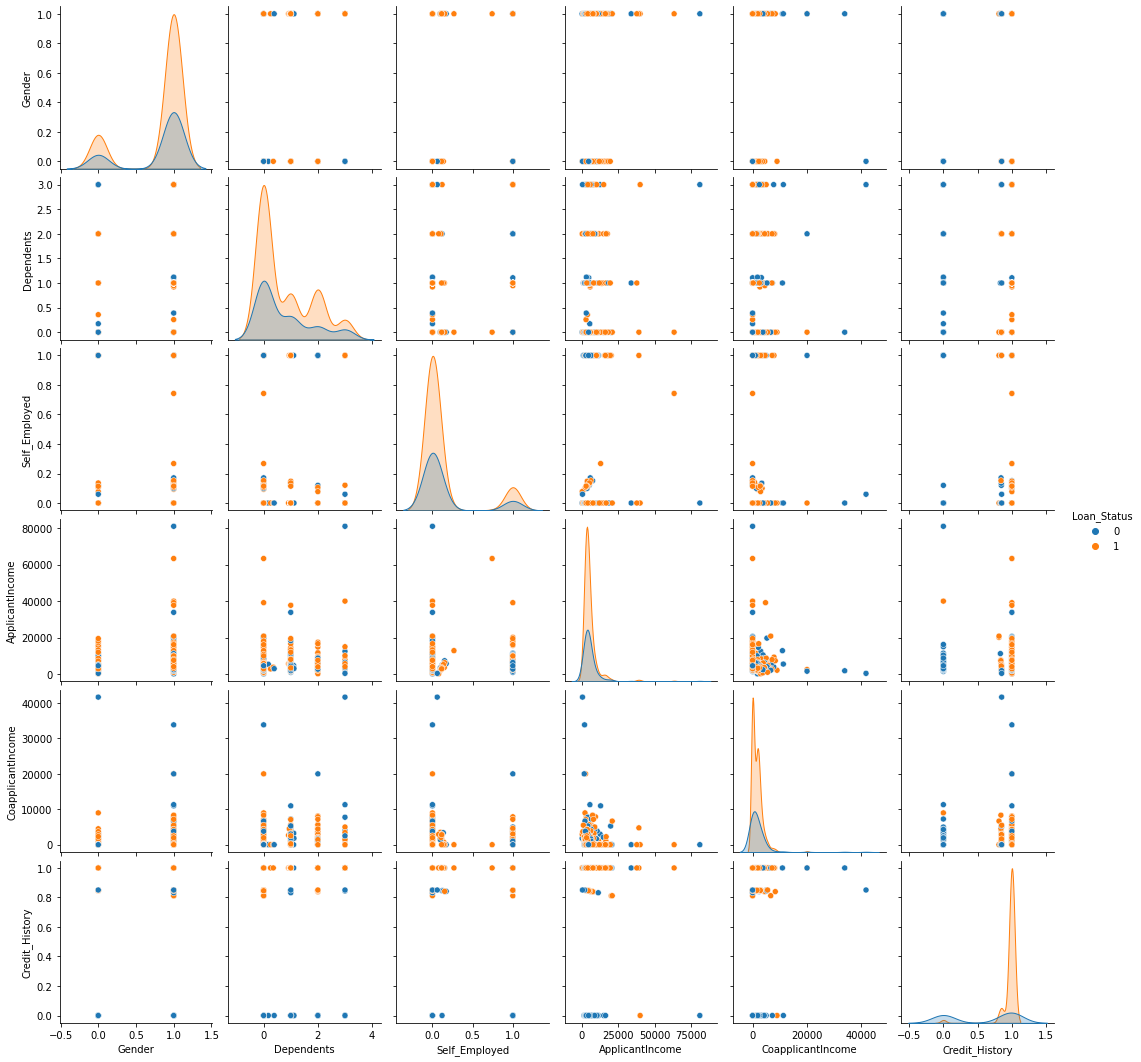

In [36]:
sns.pairplot(X.iloc[:, [0,1,2,3,4,7,-1]], hue="Loan_Status")
plt.savefig("img/pairplot_first_5_feat")
plt.show()

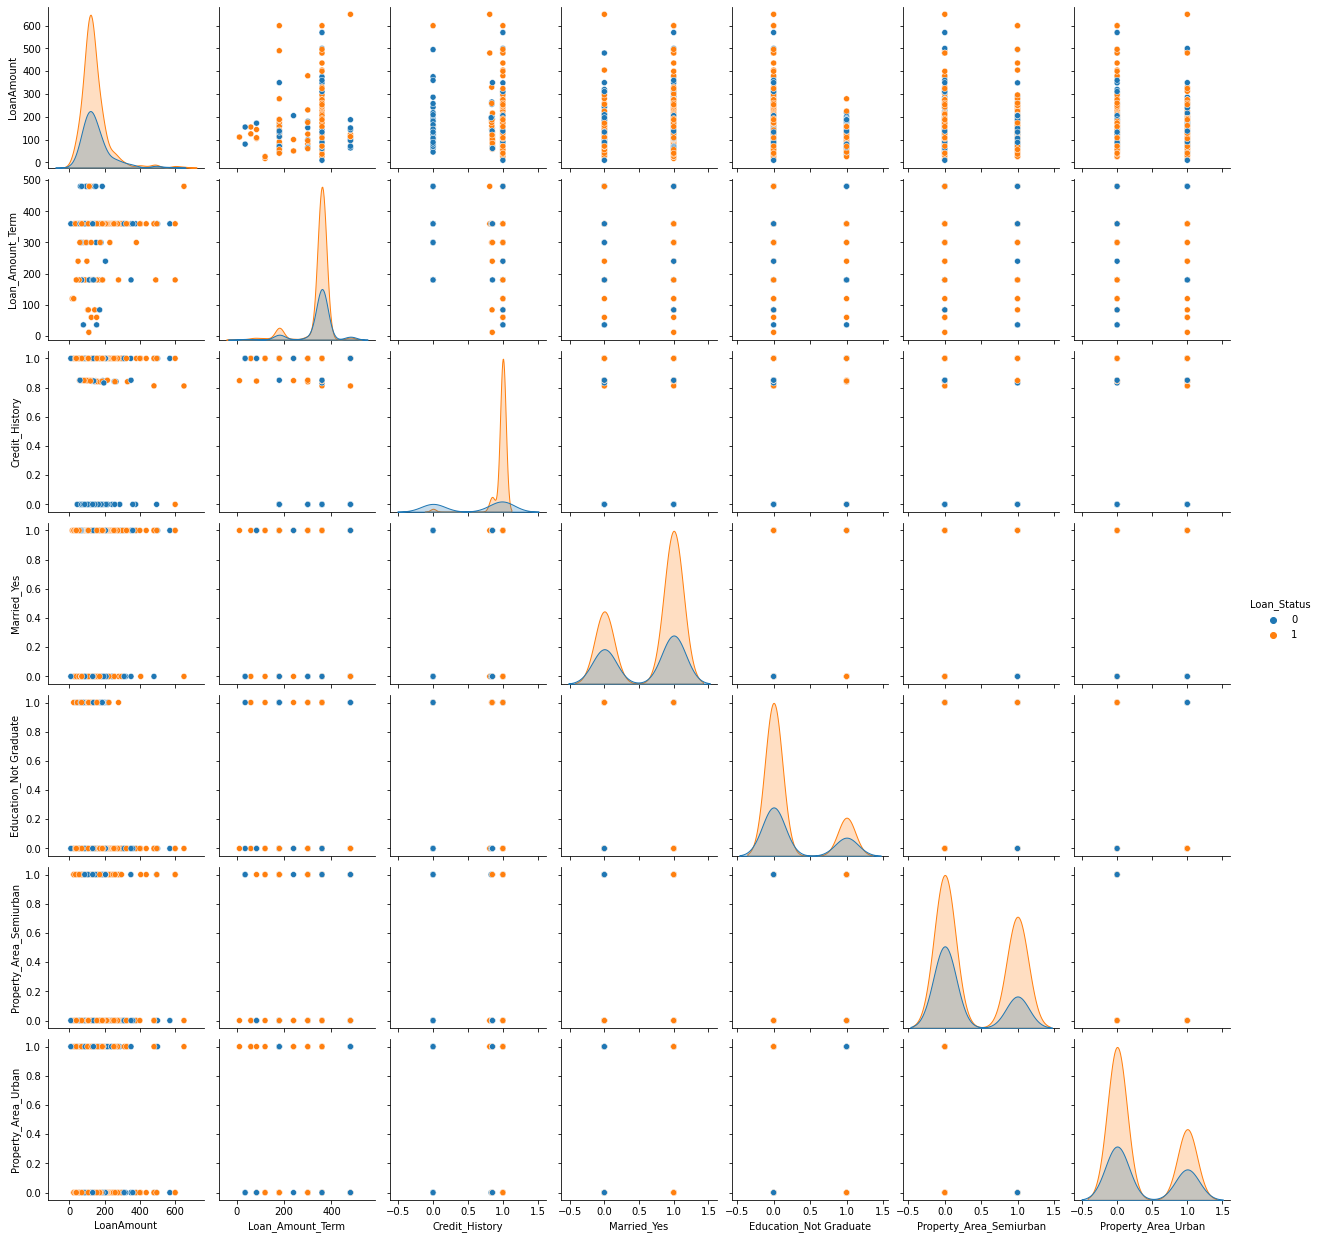

In [37]:
sns.pairplot(X.iloc[:, 5:], hue="Loan_Status")
plt.savefig("img/pairplot_feat_5_and_beyond")
plt.show()